# CmpE462
## Project Phase 1
### 25.03.2022
#### Alper Canberk Balcı - Sabri Gökberk Yılmaz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from PIL import Image
import os
from sklearn.decomposition import PCA

In [2]:
# Both helper functions are given.
def sample_sphere(r=1, npoints=1000):
    dr = np.random.rand(npoints,1)
    theta = 2*np.pi*np.random.rand(npoints,1)
    x = dr * np.cos(theta)
    y = dr * np.sin(theta)
    return np.hstack((x,y))

In [3]:
# for 1-c
def sample_sphere_shifted(r=1, npoints=1000):
    dr = np.random.rand(npoints,1)
    theta = 2*np.pi*np.random.rand(npoints,1)
    x = dr * np.cos(theta)
    y = dr * np.sin(theta) + 1
    return np.hstack((x,y))

In [4]:
def create_dataset(npoints=1000):
    points = sample_sphere(npoints=npoints) 
    points = np.hstack((np.ones(npoints).reshape(npoints,1), points))
    labels = np.sign(points[:, 2])
    return points, labels

In [5]:
# for 1-c
def create_shifted_dataset(npoints=1000):
    points = sample_sphere_shifted(npoints=npoints) 
    points = np.hstack((np.ones(npoints).reshape(npoints,1), points))
    labels = np.sign(points[:, 2] - 1)
    return points, labels

In [6]:
# for 1-c
def create_shifted_dataset_without_bias(npoints=1000):
    points = sample_sphere_shifted(npoints=npoints) 
    points = np.hstack((np.zeros(npoints).reshape(npoints,1), points))  # if we change the x[0] to be 0 instead of 1,
    # We take away the bias feature of our perceptron.
    labels = np.sign(points[:, 2] - 1) # here we subtract 1 because we want to use sign for classification and our shift is +1.
    # Thus, subtracting 1 from all the points, we can look at the sign and classify the points.
    return points, labels

In [7]:

# Create the dataset:

X, y = create_dataset()  # X: data points, y: label; X = [1, x1, x2], y = [sign]

(1000,)


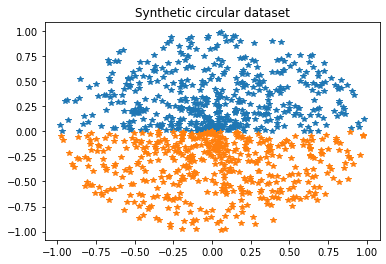

In [8]:
# Question 1.a: Visualize the data set using matplotlib
print(y.shape)
Xp_1 = X[y==1, 1]  # x1 coordinate of positive valued datapoints.
Xp_2 = X[y==1, 2]  # x2 coordinate of positive valued datapoints.
Xn_1 = X[y==-1, 1]  # x1 coordinate of negative valued datapoints.
Xn_2 = X[y==-1, 2]  # x2 coordinate of negative valued datapoints.
plt.plot(Xp_1,Xp_2,'*')  
plt.plot(Xn_1,Xn_2,'*')
plt.title("Synthetic circular dataset")
plt.show()

Weights vector after one pass over the dataset: [[ -8.67744108 -42.54954204 179.12304585]]
Prediction Accuracy: 0.887


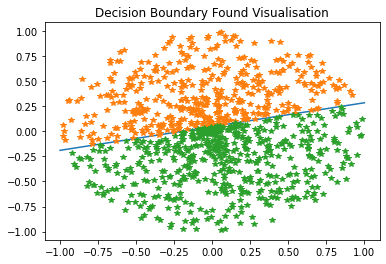

In [9]:
#  Question 1.b: Implement the Perceptron Learning Algorithm and run the algorithm for a single pass over the data
#  set, i.e. do not consider any point more than once. Report the final w vector, and prediction accuracy over
#  the entire data set. Additionally, visualize the decision boundary

npoints = 1000
W = np.random.rand(1,3)  # Initialization of weights 


misclassifieds = set()  # we could use list as well because I check if chosen once in the for loop.
chosen_once = set()

for t in range(npoints):
    if y[t]*np.dot(W, X[t]) < 0:  # i.e. If datapoint_t is misclassified, add t into the set.
        misclassifieds.add(t)

while misclassifieds:
    
    i = misclassifieds.pop()
    W = W + y[i]*X[i]  # update W with random misclassified data point.
    chosen_once.add(i)
    
    for t in range(npoints):
        if y[t]*np.dot(W, X[t]) < 0 and t not in chosen_once:  # i.e. If datapoint_t is misclassified, add t into the set.
            misclassifieds.add(t)
            break
    
    misclassifieds = misclassifieds.difference(chosen_once)

# Report the final w vector
print("Weights vector after one pass over the dataset:", W)

# Prediction accuracy over the entire data set:
true_guesses = 0
for t in range(npoints):
    if  y[t]*np.dot(W, X[t]) > 0:  # If the prediction is correct.
        true_guesses = true_guesses + 1
print("Prediction Accuracy:", true_guesses/npoints)

# Visualize the decision boundary
predictions = np.empty([npoints, 1])
for t in range(npoints):
    predictions[t] = np.sign(np.dot(W, X[t])) 
        
predictions = predictions.reshape(1000,)  # reshape, otherwise (1000,1), which causes indexerror
Xp_1 = X[predictions==1, 1]  # x1 coordinate of positive valued datapoints.
Xp_2 = X[predictions==1, 2]  # x2 coordinate of positive valued datapoints.
Xn_1 = X[predictions==-1, 1]  # x1 coordinate of negative valued datapoints.
Xn_2 = X[predictions==-1, 2]  # x2 coordinate of negative valued datapoints.


W = W.reshape(3,1)
y_points_line = [(-W[0] - W[1]*-1)/W[2], (-W[0] - W[1]*1)/W[2]]
x_points_line = [-1, 1]

plt.plot(x_points_line, y_points_line)

plt.plot(Xp_1,Xp_2,'*')  
plt.plot(Xn_1,Xn_2,'*')

plt.title("Decision Boundary Found Visualisation")
plt.show()

# https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
# https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
# https://www.kaggle.com/code/arthurtok/decision-boundaries-visualised-via-python-plotly/notebook
# These link might provide me the knowledge on drawing the decision boundary physically as a line.

The algorithm to acquire final solution, high likely, requires passing through the data more than once, because, data points chosen once can be in the misclassified datapoints set and they are need to be used to update W again.


#### Question 1.c:

* Because x[0] is 1, w[0] is basically bias in our case. Bias helps us shifting the decision boundary(changing its position). Without bias, in some situations, decision boundary cannot be formed by the perceptron.

* In our case center of the data is origin. Therefore, without the bias, we can form a decision boundary because the weight vector can be stationed at the origin, in the end when the solution occurs.  

* But if we create a dataset just like the given dataset but such that has its center away from the origin (0,0), such as (0,1), without bias, perceptron cannot find the correct decision boundary, that is, y=1 line. Because, the bias term is in the equation: w1x1 + w2x2 + w0*1 = 0 => decision boundary equation. Here, w0 helps shifting the decision boundary to the location of the correct position. 

* Lack of bias in weight vector prevents the decision boundary from passing anywhere except (0,0). It can only rotate around (0,0) and find a sub-optimal solution for decision boundary.

#### Demonstration with (1,0) centered circular dataset.

(1000,)


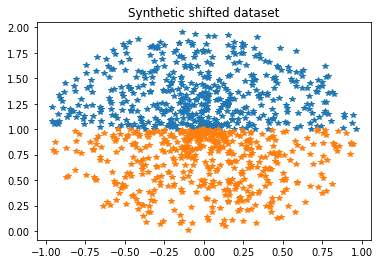

In [10]:
# Question 1.c:  Construct a simple sample that is linearly separable but is not separable with a perceptron without a bias
X, y = create_shifted_dataset()  # shifted data set **with bias** in the weights

print(y.shape)
Xp_1 = X[y==1, 1]  # x1 coordinate of positive valued datapoints.
Xp_2 = X[y==1, 2]  # x2 coordinate of positive valued datapoints.
Xn_1 = X[y==-1, 1]  # x1 coordinate of negative valued datapoints.
Xn_2 = X[y==-1, 2]  # x2 coordinate of negative valued datapoints.
plt.plot(Xp_1,Xp_2,'*')  
plt.plot(Xn_1,Xn_2,'*')
plt.title("Synthetic shifted dataset")
plt.show()

Weights vector after one pass over the dataset: [[-128.21364427  -17.00926209  133.05866305]]
Prediction Accuracy: 0.912


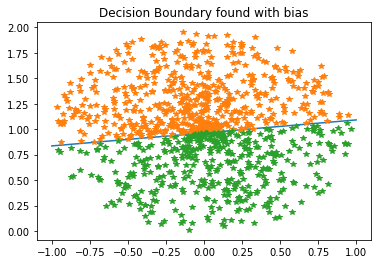

In [11]:
# 1.c Continue.
# If there is bias in the weights
npoints = 1000
W = np.random.rand(1,3)  # Initialization of weights 


misclassifieds = set()  # we could use list as well because I check if chosen once in the for loop.
chosen_once = set()

for t in range(npoints):
    if y[t]*np.dot(W, X[t]) < 0:  # i.e. If datapoint_t is misclassified, add t into the set.
        misclassifieds.add(t)

while misclassifieds:
    
    i = misclassifieds.pop()
    W = W + y[i]*X[i]  # update W with random misclassified data point.
    chosen_once.add(i)
    
    for t in range(npoints):
        if y[t]*np.dot(W, X[t]) < 0 and t not in chosen_once:  # i.e. If datapoint_t is misclassified, add t into the set.
            misclassifieds.add(t)
            break
    
    misclassifieds = misclassifieds.difference(chosen_once)
      
# Report the final w vector
print("Weights vector after one pass over the dataset:", W)

# Prediction accuracy over the entire data set:
true_guesses = 0
for t in range(npoints):
    if  y[t]*np.dot(W, X[t]) > 0:  # If the prediction is correct.
        true_guesses = true_guesses + 1
print("Prediction Accuracy:", true_guesses/npoints)

# Visualize the decision boundary
predictions = np.empty([npoints, 1])
for t in range(npoints):
    predictions[t] = np.sign(np.dot(W, X[t])) 
        
predictions = predictions.reshape(1000,)  # reshape, otherwise (1000,1), which causes indexerror
Xp_1 = X[predictions==1, 1]  # x1 coordinate of positive valued datapoints.
Xp_2 = X[predictions==1, 2]  # x2 coordinate of positive valued datapoints.
Xn_1 = X[predictions==-1, 1]  # x1 coordinate of negative valued datapoints.
Xn_2 = X[predictions==-1, 2]  # x2 coordinate of negative valued datapoints.


W = W.reshape(3,1)
y_points_line = [(-W[0] - W[1]*-1)/W[2], (-W[0] - W[1]*1)/W[2]]
x_points_line = [-1, 1]

plt.plot(x_points_line, y_points_line)

plt.plot(Xp_1,Xp_2,'*')  
plt.plot(Xn_1,Xn_2,'*')

plt.title("Decision Boundary found with bias")
plt.show()

Weights vector after one pass over the dataset: [[0.69557986 1.79436981 1.57083044]]
Prediction Accuracy: 0.56


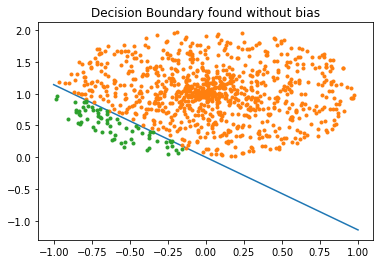

In [12]:
# 1.c Continue.
# If there is not bias in the weights
X, y = create_shifted_dataset_without_bias()  # shifted data set without bias in the weights

npoints = 1000
W = np.random.rand(1,3)  # Initialization of weights 

misclassifieds = set()  # we could use list as well because I check if chosen once in the for loop.
chosen_once = set()

for t in range(npoints):
    if y[t]*np.dot(W, X[t]) < 0:  # i.e. If datapoint_t is misclassified, add t into the set.
        misclassifieds.add(t)

while misclassifieds:
    
    i = misclassifieds.pop()
    W = W + y[i]*X[i]  # update W with random misclassified data point.
    chosen_once.add(i)
    
    for t in range(npoints):
        if y[t]*np.dot(W, X[t]) < 0 and t not in chosen_once:  # i.e. If datapoint_t is misclassified, add t into the set.
            misclassifieds.add(t)
            break
    
    misclassifieds = misclassifieds.difference(chosen_once)

    
# Report the final w vector
print("Weights vector after one pass over the dataset:", W)

# Prediction accuracy over the entire data set:
true_guesses = 0
for t in range(npoints):
    if  y[t]*np.dot(W, X[t]) > 0:  # If the prediction is correct.
        true_guesses = true_guesses + 1
print("Prediction Accuracy:", true_guesses/npoints)

# Visualize the decision boundary
predictions = np.empty([npoints, 1])
for t in range(npoints):
    predictions[t] = np.sign(np.dot(W, X[t])) 
        
predictions = predictions.reshape(1000,)  # reshape, otherwise (1000,1), which causes indexerror
Xp_1 = X[predictions==1, 1]  # x1 coordinate of positive valued datapoints.
Xp_2 = X[predictions==1, 2]  # x2 coordinate of positive valued datapoints.
Xn_1 = X[predictions==-1, 1]  # x1 coordinate of negative valued datapoints.
Xn_2 = X[predictions==-1, 2]  # x2 coordinate of negative valued datapoints.


W = W.reshape(3,1)
y_points_line = [(-W[1]*-1)/W[2], (- W[1]*1)/W[2]]  # here we don't use W[0] in the equation because there is no bias.
x_points_line = [-1, 1]

plt.plot(x_points_line, y_points_line)

plt.plot(Xp_1,Xp_2,'.')  
plt.plot(Xn_1,Xn_2,'.')

plt.title("Decision Boundary found without bias")
plt.show()

* As we can see above, without bias, our perceptron cannot find the correct decision boundary. 
* It passes through (0,0) Origin because it does not have bias which shifts the decision boundary. 
* It can only rotate, therefore, our perceptron without bias can find sub-optimal solution for the classification/decision boundary.


In [13]:
# Question 2

pics = [] # array to stack flattened images initially
for i in range(10000):
    #-----------------------------------------#
    # Q2.A 
    image = Image.open("3dshapes_train/"+str(i)+".jpg").convert('L') # reading image and applying grayscale conversion
    image = np.array(image).flatten() # image flattened
    #-----------------------------------------#
    pics.append(image) 
trainx = np.array(pics) # converting list to np array
trainy = np.load("./orientations_train.npy", mmap_mode="r") # reading labels

# below is reading of test set applying same procedures with train set
pics_test = []
for i in range(1000):
    image = Image.open("3dshapes_test/"+str(i)+".jpg").convert('L')
    image = np.array(image).flatten()
    pics_test.append(image)
testx = np.array(pics_test)
testy = np.load("./orientations_test.npy", mmap_mode="r")

In [14]:
#
#-----------------------------------------#
# Q2.B
traininv = np.linalg.pinv(trainx) # taking inverse of train data for w*=X'y 
w = np.dot(traininv, trainy) # calculating weights
#-----------------------------------------#

#-----------------------------------------#
# Q2.C
est = np.dot(testx, w) # estimation for test data
mse = np.mean((est - testy)**2) # mse calculation
#-----------------------------------------#
print("MSE: ", mse)

MSE:  0.007734050744741386


In [15]:
# Q2.D below:
pca = PCA(n_components=0.9) # construction of PCA object that preserves at least 90% of variance
pca.fit(trainx) # adjusting pca instance by train data
trainx_reduced = pca.transform(trainx) # applying pca on train data
testx_reduced = pca.transform(testx) # applying pca on test data

In [16]:
print("Size of new features after PCA: ", trainx_reduced.shape[1])
print("Used technique: PCA, implemented by scikit-learn.")

Size of new features after PCA:  8
Used technique: PCA, implemented by scikit-learn.


In [17]:
trainx_recued_inv = np.linalg.pinv(trainx_reduced) # inverse of train data
w_new = np.dot(trainx_recued_inv, trainy) # weights for pca'd data
est_new = np.matmul(testx_reduced, w_new) # estimation for pca'd data
mse = np.mean((est_new - testy)**2) # mse for pca'd data
print("MSE after PCA: ", mse)

MSE after PCA:  24.09645552989376


#### References:
* https://numpy.org/
* https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html?highlight=pinv#numpy.linalg.pinv
* https://numpy.org/doc/stable/reference/generated/numpy.matmul.html?highlight=matmul#numpy.matmul
* https://en.wikipedia.org/wiki/Perceptron
* https://moodle.boun.edu.tr/pluginfile.php/1022905/mod_resource/content/1/March14_Whiteboard.pdf
* https://moodle.boun.edu.tr/pluginfile.php/1012344/mod_resource/content/1/Lec02-Perceptron.pdf
* https://moodle.boun.edu.tr/pluginfile.php/1018155/mod_resource/content/1/Lec03-LinearRegression.pdf
* https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6
* https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
* https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
* https://www.geeksforgeeks.org/how-to-inverse-a-matrix-using-numpy/#:~:text=Inverse%20of%20a%20Matrix%20using,the%20inverse%20of%20a%20matrix.https://www.geeksforgeeks.org/how-to-inverse-a-matrix-using-numpy/#:~:text=Inverse%20of%20a%20Matrix%20using,the%20inverse%20of%20a%20matrix.
* https://pillow.readthedocs.io/en/stable/

